In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load and preprocess the dataset
df = load_and_preprocess_csv('AI.csv')



In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         487235 non-null  object
 1   generated    487235 non-null  bool  
 2   text_length  487235 non-null  int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 7.9+ MB
                                                     text  generated  \
0       Cars. Cars have been around since they became ...      False   
1       Transportation is a large necessity in most co...      False   
2       "America's love affair with it's vehicles seem...      False   
3       How often do you ride in a car? Do you drive a...      False   
4       Cars are a wonderful thing. They are perhaps o...      False   
...                                                   ...        ...   
487030  In Miami, sitting in traffic is simply a part ...      False   
487031  In the course of human history, there

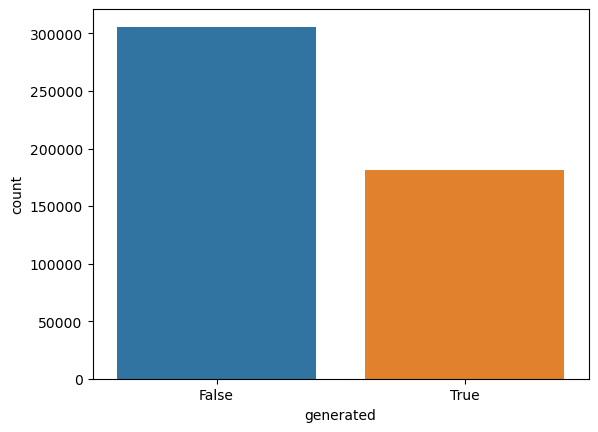

In [29]:
df.info()
df.describe()
sns.countplot(data=df,x='generated')
print(df.head(-200))


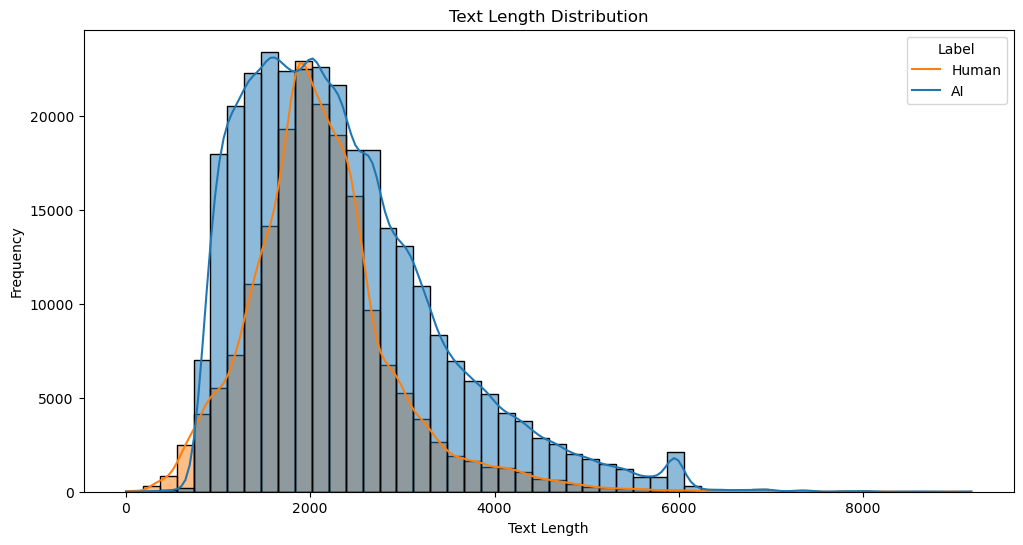

In [26]:
df['text_length'] = df['text'].apply(len)

# Plot text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df, x='text_length', hue='generated', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Human', 'AI'])
plt.show()

In [27]:
print('Total Texts:', df['generated'].count())
print('Human Written Texts:', (df['generated'] == 0.0).sum())
print('AI Generated Texts:', (df['generated'] == 1.0).sum())

Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


In [30]:
import re

def remove_tags(text):
    # Define regex pattern to match newline characters and single quotes
    pattern = r'[\n\']'
    # Use re.sub() to replace matched patterns with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Apply the remove_tags function to the 'text' column
df['text'] = df['text'].apply(remove_tags)

In [32]:
import string
def remove_punc(text):
    # Create translation table to map punctuation characters to None
    translation_table = str.maketrans('', '', string.punctuation)
    # Use translate() method to remove punctuation
    cleaned_text = text.translate(translation_table)
    return cleaned_text

df['text'] = df['text'].apply(remove_punc)

In [33]:

# Check class distribution
print("Class distribution:\n", df['generated'].value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['generated'], test_size=0.2, random_state=42)

# Creating the TF-IDF vectorizer object
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 2), stop_words='english')

# Transforming the text data into TF-IDF vectors
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Training a logistic regression model with class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Cross-validation scores
cv_scores = cross_val_score(model, vectorizer.transform(df['text']), df['generated'], cv=5)
print("Cross-validation scores:", cv_scores)

# Making predictions on the test set
predictions = model.predict(X_test_tfidf)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Class distribution:
 generated
False    305797
True     181438
Name: count, dtype: int64
Cross-validation scores: [0.98644391 0.98828081 0.98952251 0.98885548 0.98859893]
Accuracy: 0.9899432512032181
Confusion Matrix:
 [[60611   501]
 [  479 35856]]
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99     61112
        True       0.99      0.99      0.99     36335

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



In [22]:
# Sample text to predict
sample_text = "My thesis, titled 5G High PHY: Design, Development, and Validation, was guided by the esteemed Professor Kiran Kuchi. This journey has been both challenging and rewarding, allowing me to dive deep into the cutting-edge world of 5G technology.A big thank you to my guide, Professor Kiran Kumar Kuchi, for his invaluable mentorship and support. Grateful for the experiences, knowledge, and connections gained during this incredible journey at Indian Institute of Technology Hyderabad. "

# Transform the sample text into a TF-IDF vector
sample_vector = vectorizer.transform([sample_text])

# Make a prediction
prediction = model.predict(sample_vector)

print(f"The model predicts the text '{sample_text}' to be: {'AI-generated' if prediction[0] == 1 else 'Human-written'}")

The model predicts the text 'My thesis, titled 5G High PHY: Design, Development, and Validation, was guided by the esteemed Professor Kiran Kuchi. This journey has been both challenging and rewarding, allowing me to dive deep into the cutting-edge world of 5G technology.A big thank you to my guide, Professor Kiran Kumar Kuchi, for his invaluable mentorship and support. Grateful for the experiences, knowledge, and connections gained during this incredible journey at Indian Institute of Technology Hyderabad. ' to be: AI-generated
